In [1]:
# May give error about which API it was compiled against; simply run this twice
import pandas as pd

RuntimeError: module compiled against API version 0xa but this version of numpy is 0x9

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
# Convert CSV files to pandas DataFrames
log_dataframes = []
for i in xrange(1, 31):
    log_file = open("log%d.csv" % i, 'r')
    log_dataframes.append(pd.read_csv(log_file, index_col=0))
    log_file.close()

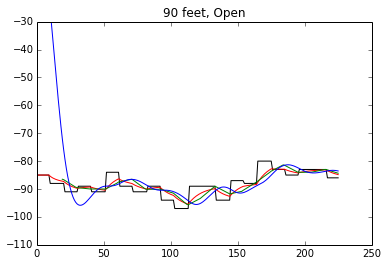

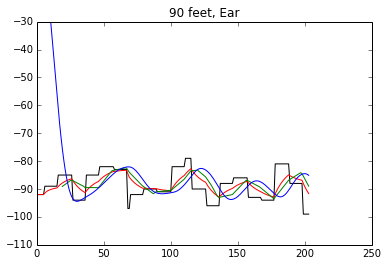

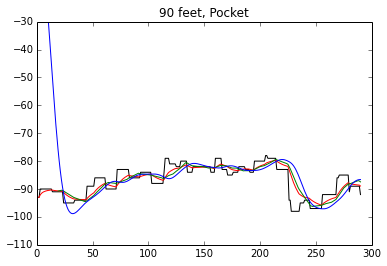

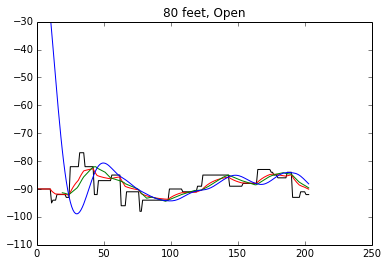

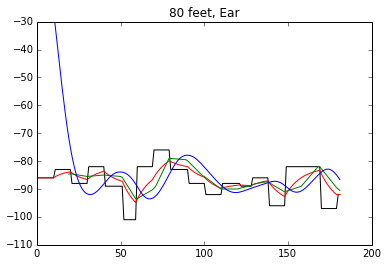

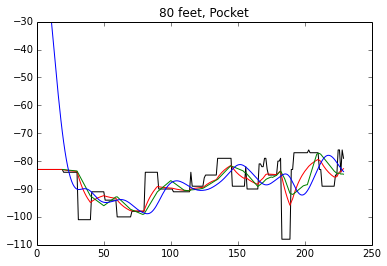

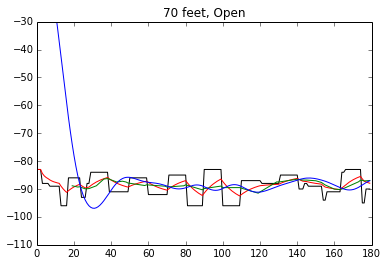

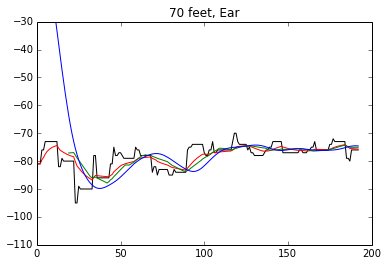

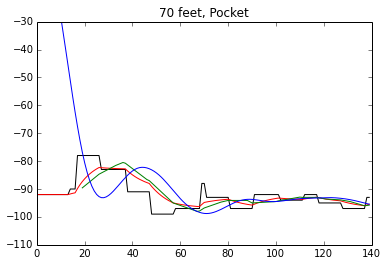

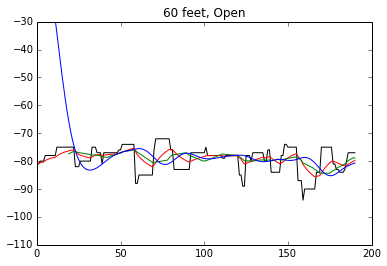

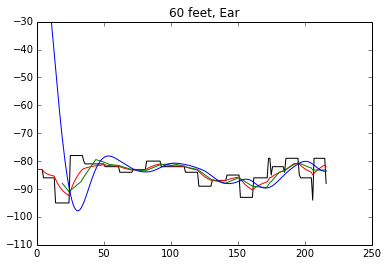

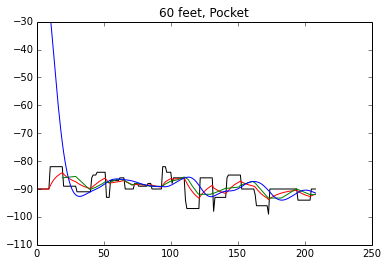

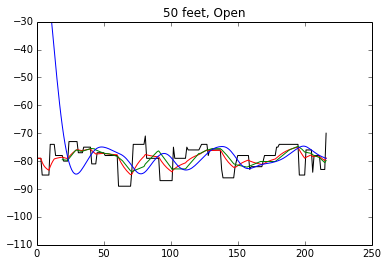

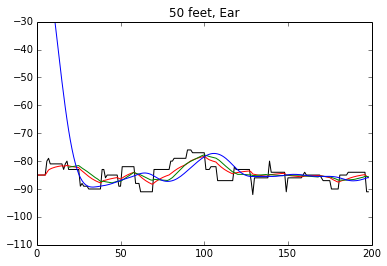

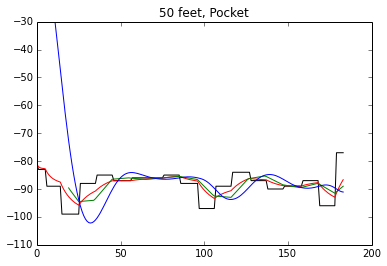

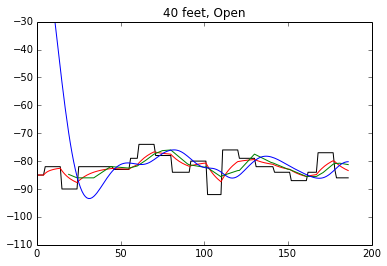

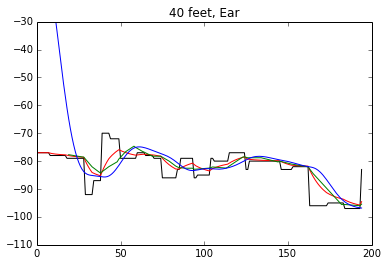

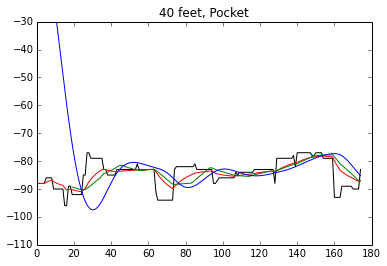

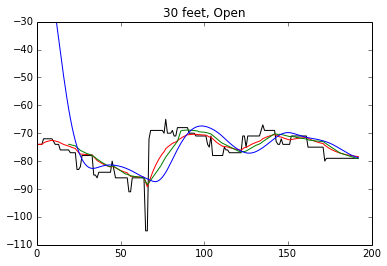

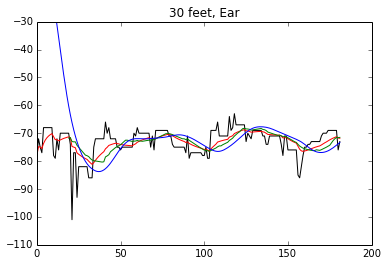

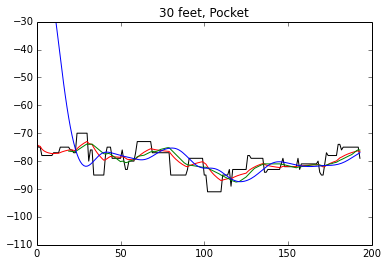

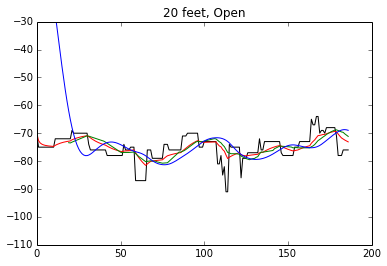

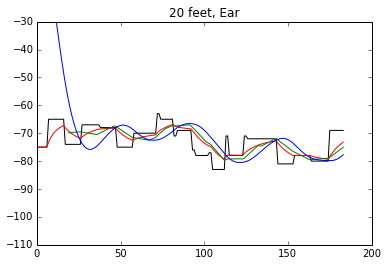

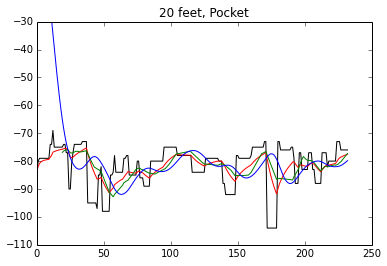

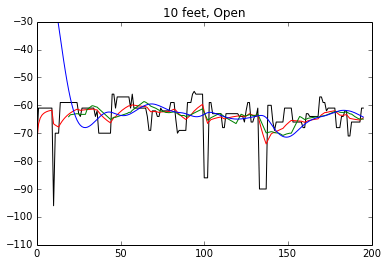

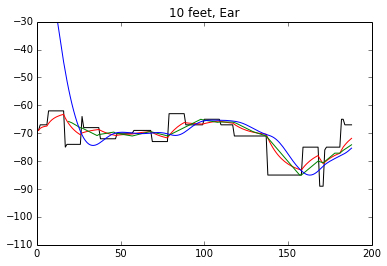

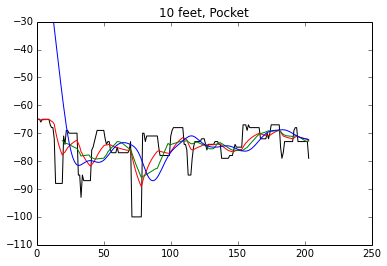

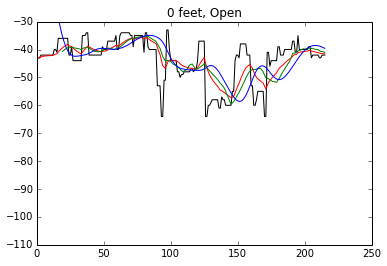

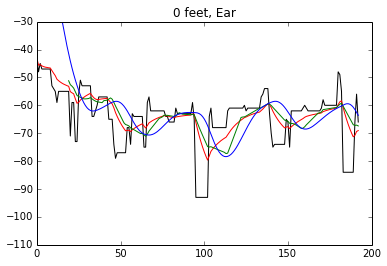

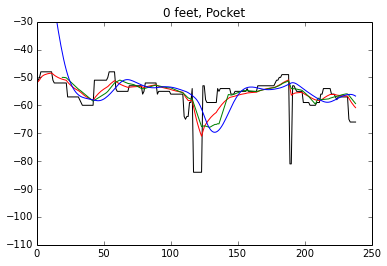

In [5]:
# Visualize RSSI over time
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

dist = 90
rec_types = ["Open", "Ear", "Pocket"]
rec_i = 0
rssi_series = []
acc_x_seris = []
for i in xrange(len(log_dataframes)):
    raw_rssi_data = log_dataframes[i]["RSSI"]
    rssi_data = raw_rssi_data[raw_rssi_data != -2147483648]
    rssi_series.append(rssi_data)
    
    x_vals = range(len(rssi_data))
    window_size = 20
    
    ma_data = pd.rolling_mean(rssi_data.values, window_size)
    ewma_data = pd.ewma(rssi_data.values, span=window_size)
    
    filter_order = 3
    sample_rate = 10.0
    cutoff_freq = 0.25
    normal_cutoff = cutoff_freq / (0.5 * sample_rate)
    
    num, den = signal.butter(filter_order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.lfilter(num, den, rssi_data.values)
    
    plt.plot(x_vals, rssi_data.values, 'k',
             x_vals, ewma_data, 'r',
             x_vals, ma_data, 'g',
             x_vals, filtered_data, 'b')
    axes = plt.gca()
    axes.set_ylim([-110, -30])
    plt.title("%d feet, %s" % (dist, rec_types[rec_i]))
    plt.show()
    
    rec_i += 1
    if rec_i >= 3:
        rec_i = 0
        dist -= 10

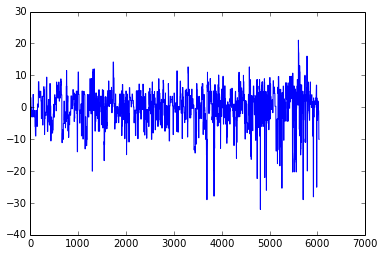

Total Std. Dev: 5.798 dB


In [7]:
# Compute total std dev of RSSI data
def normalize_rssi(rssi_vals):
    mean_rssi = np.mean(rssi_vals)
    return map(lambda x: x - mean_rssi, rssi_vals)

rssi_normalized = np.concatenate(map(normalize_rssi, rssi_series))

plt.plot(rssi_normalized)
plt.show()

print "Total RSSI Std. Dev: %.3f dB" % np.std(all_normalized)

acc_x_normalized = np.concatenate()

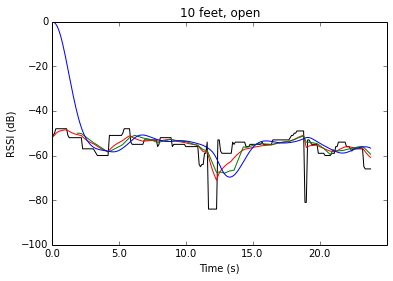

In [8]:
to_show = 24 # 10 feet, open

raw_rssi_data = log_dataframes[i]["RSSI"]
rssi_data = raw_rssi_data[raw_rssi_data != -2147483648]
rssi_series.append(rssi_data)

x_vals = range(len(rssi_data))
window_size = 20

ma_data = pd.rolling_mean(rssi_data.values, window_size)
ewma_data = pd.ewma(rssi_data.values, span=window_size)

filter_order = 3
sample_rate = 10.0
cutoff_freq = 0.25
normal_cutoff = cutoff_freq / (0.5 * sample_rate)

num, den = signal.butter(filter_order, normal_cutoff, btype='low', analog=False)
filtered_data = signal.lfilter(num, den, rssi_data.values)

plt.plot(x_vals, rssi_data.values, 'k',
         x_vals, ewma_data, 'r',
         x_vals, ma_data, 'g',
         x_vals, filtered_data, 'b')
axes = plt.gca()
axes.set_ylim([-100, 0])
plt.xticks(np.arange(0, len(rssi_data), 50.0))
axes.set_xticklabels(map(lambda x: x / 10.0, np.arange(0, len(rssi_data), 50.0)))
plt.xlabel("Time (s)")
plt.ylabel("RSSI (dB)")
plt.title("10 feet, open")
plt.show()